In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import neighbors
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from operator import itemgetter
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier

def draw_cv_graph(y_true, pred, fn='ROC.png'):
    fpr, tpr, t = roc_curve(y_true, pred, pos_label=1)
    prec, rec, t = precision_recall_curve(y_true, pred, pos_label=1)
    pairs = np.float64(sorted(zip(y_true, pred), key=itemgetter(1)))
    perc = np.percentile((1-pairs[:,1]), range(0, 110, 10))
    badrate = [np.mean(pairs[(tup[0] < (1-pairs[:,1])) & ((1-pairs[:,1]) < tup[1])][:,0]) for tup in zip(perc, perc[1:])]
    fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_true, pred, n_bins=10, normalize=False)
 
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    ax = ax.flatten()

    ax[0].plot([0, 0.5, 1], [0, 0.5, 1], color='green', ls='dashed')
    ax[0].plot(fpr, tpr, color='red')
    ax[0].plot(prec, rec, color='blue')
    ax[0].set_xlabel('RECALL/PRECISION VS. FALSE-ALARM, ROC_AUC = ' + str(roc_auc_score(y_true, pred))[:5],
                     fontsize=14)
    ax[1].yaxis.tick_right()
    ax[1].yaxis.set_label_position('right')
    ax[1].bar(np.linspace(0.03, 0.93, 10), badrate, 0.04, color='red')
    ax[1].set_xlabel('BADRATE-PER-DECILE', fontsize=14)
    ax[2].yaxis.tick_right()
    ax[2].yaxis.set_label_position('right')
    ax[2].hist(pairs[:,1], bins=20, color='blue', histtype='bar', normed=True)
    ax[2].set_xlabel('HISTOGRAM(CLASS=1)', fontsize=14)
    ax[2].yaxis.set_label_position('left')
    ax[3].plot(mean_predicted_value, fraction_of_positives,
               's-')
    ax[3].plot([0, 1], [0, 1], '--k', lw=0.5, alpha=0.5)
    ax[3].set_xlabel('CALIBRATION CURVE', fontsize=14)
 
    plt.subplots_adjust(left=0.05, right=0.95, wspace=0.1)
    plt.suptitle(classifier_model)
    plt.show(fn)

In [103]:
data = pd.read_csv('unimelb_training.csv')

#Set X and y, splitting the target column out of data
y = data.pop('Grant.Status')

cols_concat = []

#Choose all columns that have between 1 and 10 unique values, and take dummies
for i in data.columns:
    if len(data[i].value_counts()) > 1:
        if len(data[i].value_counts()) < 100:
            cols_concat.append(pd.get_dummies(data[i]))
            
X = pd.concat(cols_concat, axis = 1)

In [104]:
#Split data into training and test sets, and then display shapes of those sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7837, 2362), (871, 2362), (7837,), (871,))

In [105]:
#Set data into pre and post 2008 data. 
data_2008 = data[data['Start.date'].apply(lambda x: x[-2:] == '08')]
data_pre_2008 = data[data['Start.date'].apply(lambda x: x[-2:] != '08')]

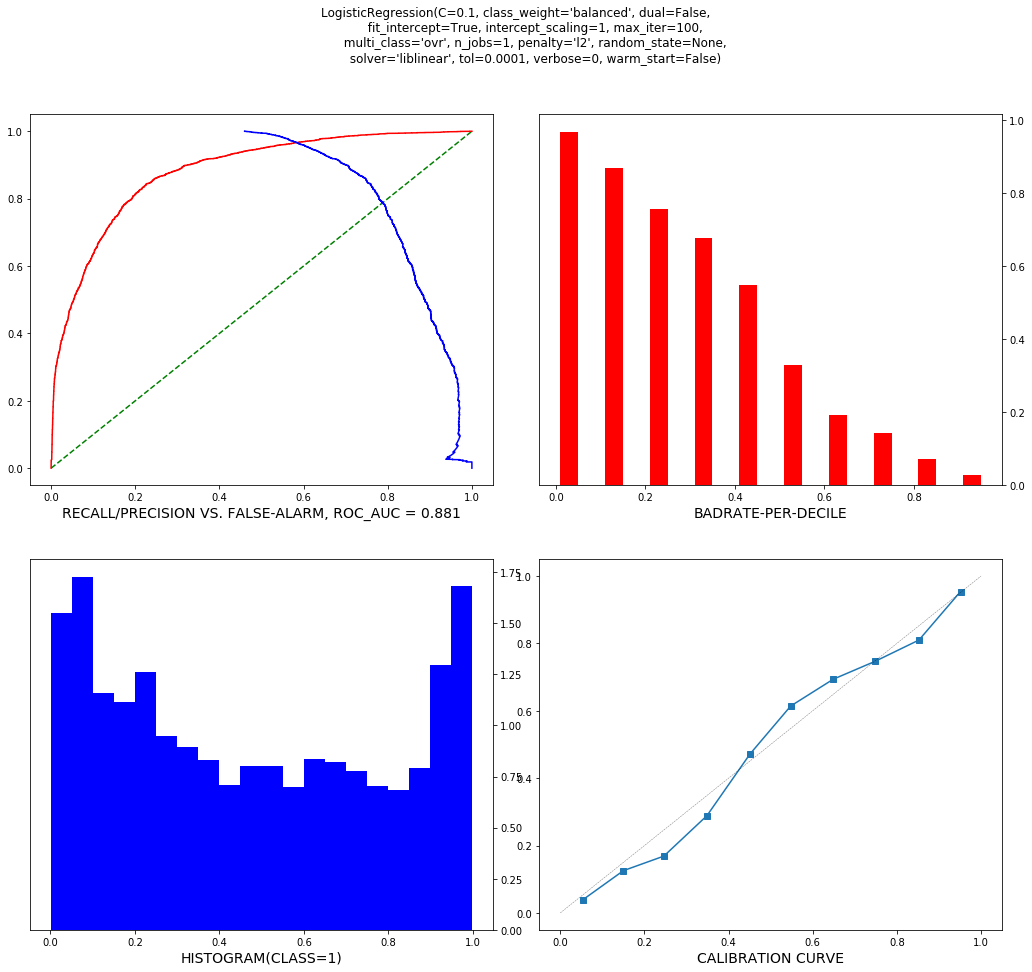

In [118]:
classifier_model = LogisticRegression(C= 0.1, class_weight='balanced')

y_pred = cross_val_predict(classifier_model, X, y, method= 'predict_proba')
y_pred_bin = cross_val_predict(classifier_model, X, y, method= 'predict')

draw_cv_graph(y, y_pred[:,1], fn='../visualisations/classifymeanpurchase.png')

Confusion matrix, without normalization
[[3900  816]
 [ 869 3123]]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.22  0.78]]


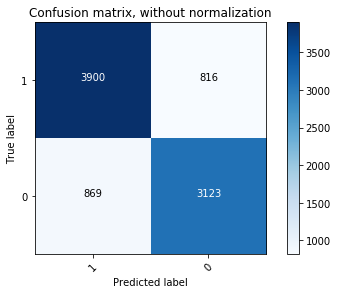

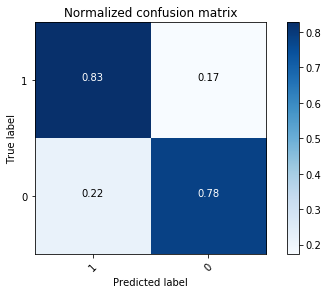

In [122]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['1', '0']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_pred_bin)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()